In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.datasets import mnist # 앞으로는 이렇게 mnist를 호출하면 됌.

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_one_hot = np.eye(10)[Y_train]

%matplotlib inline  
print ("packs loaded")

packs loaded


In [40]:
# one_hot_encoding에서 사용.

np.eye(10)[Y_train][:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

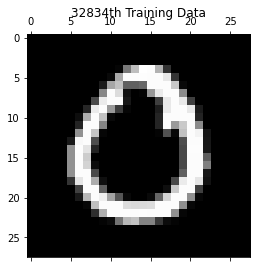

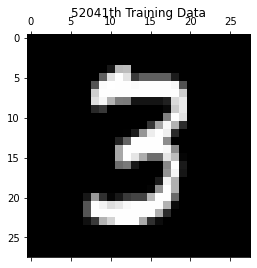

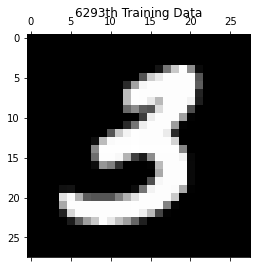

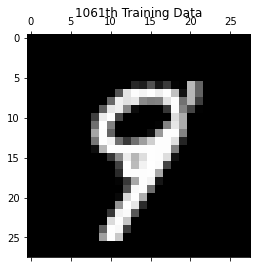

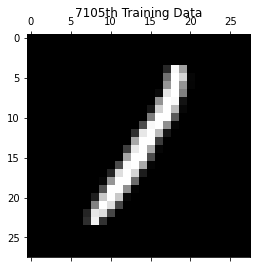

In [52]:
nsample = 5

randidx = np.random.randint(X_train.shape[0], size = nsample)
for i in randidx:
    # image & label
    curr_img = np.reshape(X_train[i,:], (28,28))
    curr_label = np.argmax(Y_one_hot[i,:])
    
    # matshow
    plt.matshow(curr_img, cmap = "gray")
    plt.title(str(i)+"th Training Data")
    

# Mini_batch 단위로 학습을 진행, 이때 batch가 random하게 적용되도록 하기.

In [58]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1

rand_indices = np.random.permutation(ntrain)
rand_indices

array([1, 7, 3, 9, 4, 8, 5, 6, 0, 2])

In [81]:

for epoch in range(5):
    rand_indices = np.random.permutation(ntrain) # random한 숫자를 여러개 뽑을 수 있음.
    for i in range(niter):
        curr_indices = rand_indices[i*nbatch:(i+1)*nbatch] #batch 단위로 가져옴.
        print("curr_index",curr_indices)
        
        xbatch = X_train[curr_indices] 
        ybatch = np.argmax(Y_one_hot[curr_indices], axis = 1)
        print("x_shape:", xbatch.shape, "// Y:", ybatch)
    print()
        
    

curr_index [3 2 7 4]
x_shape: (4, 28, 28) // Y: [1 4 3 9]
curr_index [6 5 9 8]
x_shape: (4, 28, 28) // Y: [1 2 4 1]
curr_index [0 1]
x_shape: (2, 28, 28) // Y: [5 0]

curr_index [6 2 9 1]
x_shape: (4, 28, 28) // Y: [1 4 4 0]
curr_index [8 5 0 3]
x_shape: (4, 28, 28) // Y: [1 2 5 1]
curr_index [4 7]
x_shape: (2, 28, 28) // Y: [9 3]

curr_index [4 0 5 8]
x_shape: (4, 28, 28) // Y: [9 5 2 1]
curr_index [7 9 6 1]
x_shape: (4, 28, 28) // Y: [3 4 1 0]
curr_index [2 3]
x_shape: (2, 28, 28) // Y: [4 1]

curr_index [3 8 1 0]
x_shape: (4, 28, 28) // Y: [1 1 0 5]
curr_index [9 7 5 2]
x_shape: (4, 28, 28) // Y: [4 3 2 4]
curr_index [4 6]
x_shape: (2, 28, 28) // Y: [9 1]

curr_index [3 0 5 6]
x_shape: (4, 28, 28) // Y: [1 5 2 1]
curr_index [8 2 9 7]
x_shape: (4, 28, 28) // Y: [1 4 4 3]
curr_index [1 4]
x_shape: (2, 28, 28) // Y: [0 9]

